In [440]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [441]:
data = pd.read_excel("Date_Fruit_Datasets.xlsx")
data.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [443]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [444]:
data.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

## Целевая переменная

In [445]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

<AxesSubplot:xlabel='Class', ylabel='count'>

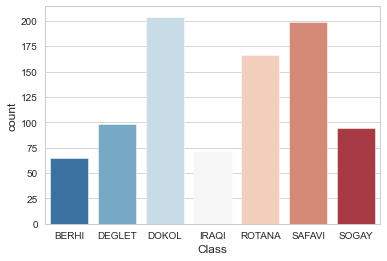

In [446]:
sns.set_style('whitegrid')
sns.countplot(x="Class",data=train,palette='RdBu_r')

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

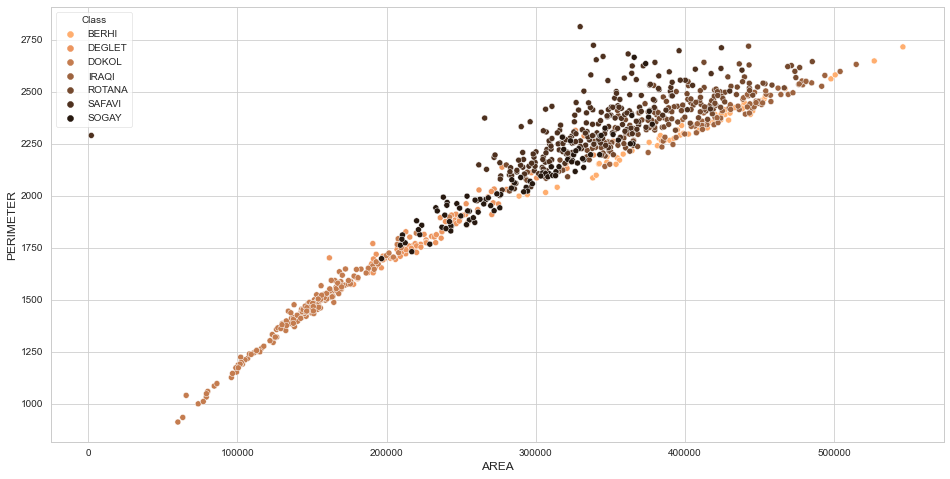

In [447]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data['AREA'],y=data['PERIMETER'],hue=data['Class'],palette='copper_r',legend='auto')

In [448]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['Class']=le.fit_transform(data['Class'])

In [449]:
data['Class'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [450]:
data.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,...,0.218253,0.326335,0.381096,-0.359332,-0.393124,-0.506256,-0.353446,-0.380747,-0.376277,0.281938
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,...,0.313334,0.398168,0.364269,-0.266206,-0.294308,-0.416802,-0.451028,-0.468571,-0.448409,0.420245
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,...,0.366579,0.460468,0.347940,-0.146311,-0.167972,-0.297395,-0.530231,-0.538497,-0.506782,0.479079
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,...,0.093267,0.189532,0.354742,-0.466776,-0.501442,-0.585234,-0.196256,-0.231847,-0.246312,0.153904
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,...,0.215284,0.194135,-0.179358,0.431537,0.463969,0.442189,-0.252331,-0.238875,-0.180563,0.311292
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,...,0.225588,0.336750,0.369371,-0.346338,-0.376846,-0.490680,-0.372169,-0.408394,-0.400709,0.308402
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,...,-0.128394,-0.062084,0.069564,-0.038697,-0.040841,-0.057491,0.076950,0.054499,0.052089,-0.358905
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,...,0.225350,0.330451,0.375691,-0.356994,-0.390580,-0.503137,-0.358603,-0.385656,-0.380788,0.302007
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,...,-0.330393,-0.322600,-0.046479,-0.217372,-0.207224,-0.179696,0.352850,0.337605,0.321010,-0.408452
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,...,0.040208,-0.023360,0.058655,0.058019,0.061742,0.067152,-0.010716,0.076399,0.076425,0.036051


Уберем признаки с низкой корреляцией

In [451]:
features=data.drop(columns = ['Class', 'StdDevRB', 'SHAPEFACTOR_4', 'ROUNDNESS', 'ASPECT_RATIO', 'EXTENT', 'SOLIDITY', 'SHAPEFACTOR_1'])
label = data['Class']

In [452]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.30, shuffle=True, random_state=47)

# KNN

In [470]:
from sklearn.neighbors import KNeighborsClassifier

In [471]:
model_KNN = KNeighborsClassifier()

In [472]:
model_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [473]:
y_pred_KNN = model_KNN.predict(X_test)

In [474]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [475]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.70      0.61      0.66        31
           2       0.92      0.97      0.94        60
           3       0.81      0.89      0.85        19
           4       0.93      1.00      0.96        53
           5       0.97      1.00      0.98        62
           6       0.79      0.71      0.75        31

    accuracy                           0.89       270
   macro avg       0.86      0.83      0.84       270
weighted avg       0.88      0.89      0.88       270



Посмотрим частоту измениения ошибок для различных к

In [476]:
error_rates = []
for i in np.arange(1, 50):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train,y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

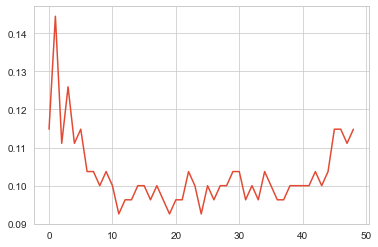

In [477]:
plt.plot(error_rates)

In [478]:
model_KNN_new = KNeighborsClassifier(n_neighbors = 20)
model_KNN_new.fit(X_train,y_train)
y_pred_KNN_new = model_KNN_new.predict(X_test)
print(classification_report(y_test, y_pred_KNN_new))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.79      0.61      0.69        31
           2       0.91      0.97      0.94        60
           3       0.89      0.89      0.89        19
           4       0.93      1.00      0.96        53
           5       0.98      1.00      0.99        62
           6       0.81      0.81      0.81        31

    accuracy                           0.91       270
   macro avg       0.89      0.87      0.88       270
weighted avg       0.90      0.91      0.90       270



# Log_regression

In [487]:
from sklearn.linear_model import LogisticRegression

In [494]:
model_LR = LogisticRegression(penalty = 'l2', solver='saga', max_iter= 50, n_jobs=-1 )
model_LR.fit(X_train,y_train)
y_log_pred = model_LR.predict(X_test)
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.58      0.72        31
           2       0.91      0.98      0.94        60
           3       1.00      0.89      0.94        19
           4       0.95      0.98      0.96        53
           5       0.97      1.00      0.98        62
           6       0.78      0.90      0.84        31

    accuracy                           0.92       270
   macro avg       0.93      0.90      0.90       270
weighted avg       0.93      0.92      0.92       270



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [322]:
model_LR.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=110, n_jobs=-1, solver='saga')

In [323]:
y_log_pred_LR = model_LR.predict(X_test)

In [324]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.61      0.75        31
           2       0.92      0.98      0.95        60
           3       1.00      0.89      0.94        19
           4       0.95      1.00      0.97        53
           5       0.97      1.00      0.98        62
           6       0.80      0.90      0.85        31

    accuracy                           0.93       270
   macro avg       0.93      0.90      0.91       270
weighted avg       0.93      0.93      0.93       270



In [500]:
param_grid = {'max_iter':range(100, 150, 10)}

In [501]:
clf = GridSearchCV(LogisticRegression(penalty = 'l2', solver='saga', n_jobs=-1), param_grid)

In [502]:
clf.fit(X_train , y_train)
lg_params = clf.best_params_
lg_params

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'max_iter': 100}

In [503]:
model_LR_new = LogisticRegression(penalty = 'l2', solver='saga', max_iter= 100, n_jobs=-1 )
model_LR_new.fit(X_train,y_train)
y_log_pred_new = model_LR_new.predict(X_test)
print(classification_report(y_test,y_log_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.61      0.75        31
           2       0.92      0.98      0.95        60
           3       1.00      0.89      0.94        19
           4       0.95      1.00      0.97        53
           5       0.97      1.00      0.98        62
           6       0.80      0.90      0.85        31

    accuracy                           0.93       270
   macro avg       0.93      0.90      0.91       270
weighted avg       0.93      0.93      0.93       270



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# RandomForestClassifier

In [511]:
from sklearn.ensemble import RandomForestClassifier

In [512]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)
y_RFC_pred = RFC_model.predict(X_test)
print(classification_report(y_test,y_RFC_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.77      0.65      0.70        31
           2       0.92      0.95      0.93        60
           3       0.89      0.84      0.86        19
           4       0.91      0.96      0.94        53
           5       0.97      1.00      0.98        62
           6       0.78      0.81      0.79        31

    accuracy                           0.89       270
   macro avg       0.87      0.85      0.85       270
weighted avg       0.89      0.89      0.89       270



In [513]:
features=data.drop(columns = ['Class'])
label = data['Class']

In [514]:
data.columns


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [515]:
features_col = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

In [516]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [517]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.30, shuffle=True, random_state=47)

In [518]:
model_RFC_up = RandomForestClassifier()
model_RFC_up.fit(X_train,y_train)
y_RFC_pred_up = model_RFC_up.predict(X_test)
print(classification_report(y_test,y_RFC_pred_up))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.74      0.65      0.69        31
           2       0.93      0.92      0.92        60
           3       0.89      0.89      0.89        19
           4       0.93      0.96      0.94        53
           5       0.97      1.00      0.98        62
           6       0.79      0.87      0.83        31

    accuracy                           0.90       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.90      0.90      0.90       270



In [521]:
import pandas as pd
feature_imp = pd.Series(model_RFC_up.feature_importances_,index=features_col).sort_values(ascending=False)
feature_imp

MINOR_AXIS       0.081895
MeanRR           0.058450
CONVEX_AREA      0.058006
AREA             0.052237
EQDIASQ          0.051953
PERIMETER        0.051125
SHAPEFACTOR_1    0.049536
SkewRB           0.042929
EntropyRR        0.040495
ALLdaub4RR       0.037639
EntropyRG        0.034746
MeanRG           0.033096
ROUNDNESS        0.030198
KurtosisRG       0.029997
SkewRG           0.029513
ALLdaub4RG       0.026561
EntropyRB        0.024312
KurtosisRB       0.023594
MAJOR_AXIS       0.022876
MeanRB           0.022134
ALLdaub4RB       0.019515
SHAPEFACTOR_2    0.018640
COMPACTNESS      0.018320
ASPECT_RATIO     0.017717
ECCENTRICITY     0.016552
SOLIDITY         0.016314
SHAPEFACTOR_4    0.015126
SHAPEFACTOR_3    0.014269
SkewRR           0.013604
StdDevRG         0.011804
StdDevRB         0.010682
EXTENT           0.010299
KurtosisRR       0.009596
StdDevRR         0.006274
dtype: float64

In [546]:
features = data.drop(columns = ['Class','StdDevRB', 'StdDevRR', 'EXTENT', 'KurtosisRR', 'StdDevRG', 'SHAPEFACTOR_4'
                                , 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SOLIDITY', 'COMPACTNESS', 'SkewRR', 'ECCENTRICITY'])
label = data['Class']

In [547]:
scaler.fit(features)
features = scaler.transform(features)

In [548]:
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.30, shuffle=True, random_state=47)

In [549]:
model_RFC2 = RandomForestClassifier()

In [550]:
model_RFC2.fit(X_train,y_train)

RandomForestClassifier()

In [551]:
y_RFC_pred2 = model_RFC2.predict(X_test)

In [552]:
print(classification_report(y_test,y_RFC_pred2))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.67      0.65      0.66        31
           2       0.93      0.92      0.92        60
           3       0.94      0.89      0.92        19
           4       0.91      0.98      0.95        53
           5       0.97      1.00      0.98        62
           6       0.83      0.77      0.80        31

    accuracy                           0.90       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.89      0.90      0.89       270



In [555]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(model_RFC2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [560]:
model_RFC3 = RandomForestClassifier(n_estimators = 700, min_samples_split = 12, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 13, bootstrap = False)

In [561]:
model_RFC3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12,
                       n_estimators=700)

In [562]:
y_RFC_pred3 = model_RFC2.predict(X_test)

In [563]:
print(classification_report(y_test,y_RFC_pred3))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.67      0.65      0.66        31
           2       0.93      0.92      0.92        60
           3       0.94      0.89      0.92        19
           4       0.91      0.98      0.95        53
           5       0.97      1.00      0.98        62
           6       0.83      0.77      0.80        31

    accuracy                           0.90       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.89      0.90      0.89       270

